## 画图练习

In [19]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [46]:
col_names =['Country','Continent','Life_expectancy','GDP_per_capita','Population']  #设置表头（列标签）
data= pd.read_csv('WorldIndex.csv')  
print(data.shape) 
data.head()  

(177, 5)


,Country,Continent,Life_expectancy,GDP_per_capita,Population
0,Algeria,Africa,75.042537,4132.760292,39871528.0
1,Angola,Africa,52.666098,3695.793748,27859305.0
2,Benin,Africa,59.720707,783.947091,10575952.0
3,Botswana,Africa,64.487415,6532.060501,2209197.0
4,Burundi,Africa,57.107049,303.681022,10199270.0


In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 5 columns):
Country            177 non-null object
Continent          177 non-null object
Life_expectancy    169 non-null float64
GDP_per_capita     169 non-null float64
Population         176 non-null float64
dtypes: float64(3), object(2)
memory usage: 7.0+ KB


In [49]:
data.isnull().sum()

Country            0
Continent          0
Life_expectancy    8
GDP_per_capita     8
Population         1
dtype: int64

In [51]:
Life_expectancy_null = data[pd.isnull(data['Life_expectancy'])]
Life_expectancy_null

,Country,Continent,Life_expectancy,GDP_per_capita,Population
87,Andorra,Europe,NaN,NaN,78014.0
116,Monaco,Europe,NaN,NaN,38307.0
123,San Marino,Europe,NaN,NaN,32960.0
138,Dominica,North America,NaN,7069.502788,73162.0
154,Marshall Islands,Oceania,NaN,3385.904065,52994.0
156,Nauru,Oceania,NaN,8052.888385,12475.0
158,Palau,Oceania,NaN,13500.563700,21288.0
163,Tuvalu,Oceania,NaN,2970.027974,11001.0


In [53]:
GDP_per_capita_null = data[pd.isnull(data['GDP_per_capita'])]
GDP_per_capita_null

,Country,Continent,Life_expectancy,GDP_per_capita,Population
13,Eritrea,Africa,64.100902,NaN,NaN
23,Libya,Africa,71.826317,NaN,6234955.0
87,Andorra,Europe,NaN,NaN,78014.0
110,Liechtenstein,Europe,82.073171,NaN,37403.0
116,Monaco,Europe,NaN,NaN,38307.0
123,San Marino,Europe,NaN,NaN,32960.0
159,Papua New Guinea,Oceania,62.776683,NaN,7919825.0
176,Venezuela,South America,74.409610,NaN,31155134.0


In [54]:
Population_null = data[pd.isnull(data['Population'])]
Population_null

,Country,Continent,Life_expectancy,GDP_per_capita,Population
13,Eritrea,Africa,64.100902,NaN,NaN


In [55]:
new_data = data.dropna(axis=0, subset=['Life_expectancy','GDP_per_capita','Population'])
print(new_data.shape)

(164, 5)


In [56]:
dataAfrica=worldindex[worldindex.Continent=="Africa"]
Africa.describe().Continent.value_counts()  

Africa           50
Europe           45
Asia             36
North America    20
Oceania          14
South America    12
Name: Continent, dtype: int64

In [57]:
Africa=data[data.Continent=="Africa"]
Africa.describe()

,Life_expectancy,GDP_per_capita,Population
count,50.000000,48.000000,4.900000e+01
mean,61.606192,2355.184304,2.182988e+07
std,6.677911,3037.958053,3.191853e+07
min,48.873951,303.681022,9.341900e+04
25%,57.190512,594.529745,2.425561e+06
50%,61.730378,1046.260588,1.188214e+07
75%,64.812268,2919.695454,2.758282e+07
max,75.042537,15390.040640,1.811817e+08


In [60]:
str(object) 
import warnings 
warnings.filterwarnings("ignore") 
new_data['Life_expectancy'] = pd.to_numeric(new_data['Life_expectancy'],errors='coerce')
new_data['GDP_per_capita'] = pd.to_numeric(new_data['GDP_per_capita'],errors='coerce')
new_data['Population'] = pd.to_numeric(new_data['Population'],errors='coerce')
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 164 entries, 0 to 175
Data columns (total 5 columns):
Country            164 non-null object
Continent          164 non-null object
Life_expectancy    164 non-null float64
GDP_per_capita     164 non-null float64
Population         164 non-null float64
dtypes: float64(3), object(2)
memory usage: 7.7+ KB


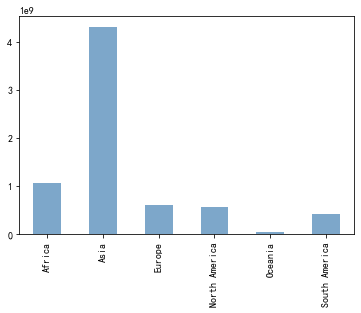

In [62]:
Africa=data[data.Continent=="Africa"]
Asia=data[data.Continent=="Asia"]
Europe=data[data.Continent=='Europe']
NorthAmerica=data[data.Continent=='North America']
Oceania=data[data.Continent=='Oceania']
SouthAmerica=data[data.Continent=='South America']
p=pd.Series([Africa.Population.sum(), Asia.Population.sum(), Europe.Population.sum(), NorthAmerica.Population.sum(), Oceania.Population.sum(),SouthAmerica.Population.sum()], index=['Africa', 'Asia', 'Europe', 'North America', 'Oceania','South America'])
p.plot(kind='bar',color = 'steelblue', alpha = 0.7)

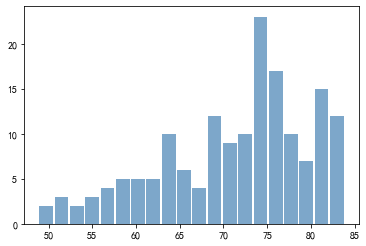

In [65]:
plt.hist(new_data.Life_expectancy, bins=20, color = 'steelblue', alpha = 0.7,rwidth=0.9,)
plt.show()

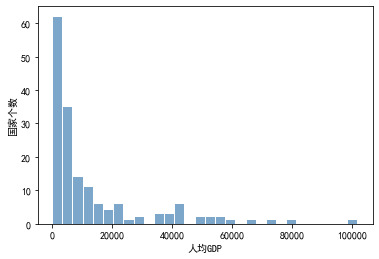

In [67]:
plt.rcParams['font.sans-serif']=['SimHei'] 
plt.hist(new_data.GDP_per_capita,bins=30,color = 'steelblue', alpha = 0.7,rwidth=0.9)
plt.xlabel('人均GDP')
plt.ylabel('国家个数')
plt.show()

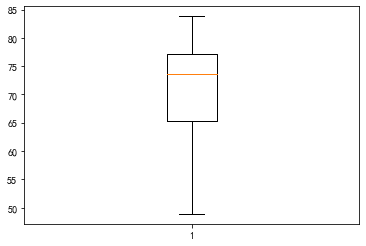

In [68]:
plt.boxplot(new_data.Life_expectancy)
plt.show()

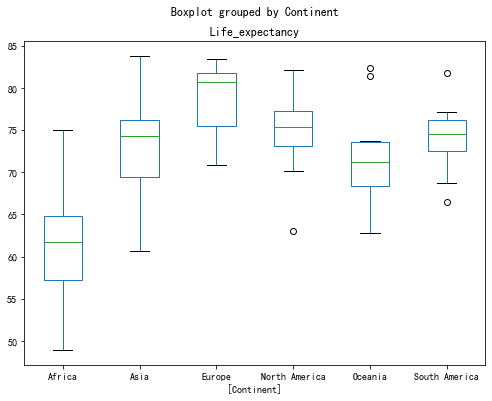

In [70]:
data[['Life_expectancy', 'Continent']].boxplot(grid=False, by='Continent', figsize=(8, 6))

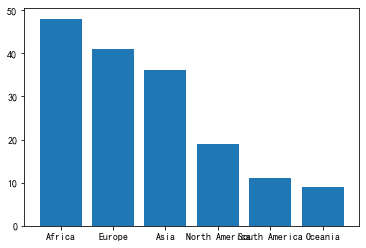

In [72]:
import numpy as np
conti_count = new_data.Continent.value_counts()  # 统计每个州的国家数
conti = list(conti_count.index)  # 获取各大州名称
x = np.arange(len(conti))
plt.bar(x, conti_count,)   # 条形图
plt.xticks(x, conti)  # 设置横坐标
plt.show()

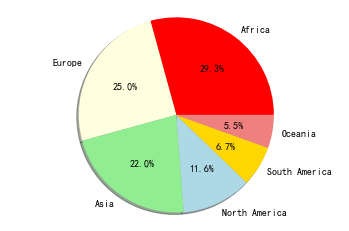

In [73]:
labels = conti
colors = ['red', 'lightyellow', 'lightgreen','lightblue','gold','lightcoral']
plt.pie(conti_count, labels=labels, colors=colors,shadow=True,autopct='%1.1f%%')  # autopct 显示占比
plt.axis('equal')  # 调整坐标轴的比例
plt.show()

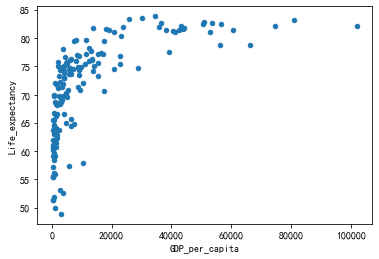

In [74]:
data.plot(kind='scatter', x="GDP_per_capita", y="Life_expectancy")

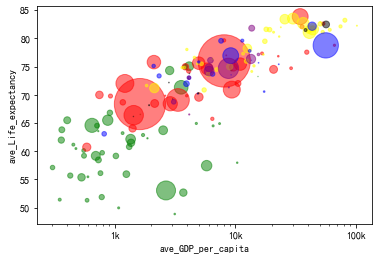

In [75]:
map_dict = {      
    'Asia':'red',
    'Europe':'yellow',
    'Africa':'green',
    'North America':'blue',
    'South America':'purple',
    'Oceania':'black'
}
colors = new_data.Continent.map(map_dict)   
size = new_data.Population / 1e6 * 2
plt.scatter(x=new_data.GDP_per_capita, y=new_data.Life_expectancy, s=size, c=colors, alpha=0.5)  # 参数c设置颜色，alpha设置透明度
plt.xscale('log')

plt.xlabel('ave_GDP_per_capita')
plt.ylabel('ave_Life_expectancy')

tick_val = [1000,10000,100000]
tick_lab = ['1k','10k','100k']
plt.xticks(tick_val, tick_lab)

plt.show()

## scipy解方程

In [4]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root,fsolve

In [7]:
f1=lambda x:np.sin(x)*2-x+1
sol1_root = root(f1,[0])
print('sol1_root:',sol1_root)
print('sol1_root.x',sol1_root.x)
sol1_fsolve = fsolve(f1,[0])
print('sol1_fsolve:',sol1_fsolve)

sol1_root:     fjac: array([[-1.]])
     fun: array([0.31514905])
 message: 'The iteration is not making good progress, as measured by the \n  improvement from the last ten iterations.'
    nfev: 24
     qtf: array([-0.31514905])
       r: array([0.00451924])
  status: 5
 success: False
       x: array([-1.04882813])
sol1_root.x [-1.04882813]
sol1_fsolve: [-1.04882813]


In [8]:
def f2(x):
    return np.array([3*x[0]+2*x[1]-3,x[0]-2*x[1]-5])
f2=lambda x:np.array([3*x[0]+2*x[1]-3,x[0]-2*x[1]-5])
sol2_root = root(f2,[0,0])
sol2_fsolve = fsolve(f2,[0,0])
print('sol2_fsolve:',sol2_fsolve) # [2. -1.5]
a = np.array([[3,2],[1,-2]])
b = np.array([3,5])
x = np.linalg.solve(a,b)
print('x:',x)

sol2_fsolve: [ 2.  -1.5]
x: [ 2.  -1.5]
